1. Create a Jupyter Notebook named linear_regression_weka_scikit.ipynb using as template the linear regression example found here:
https://github.com/computingcelts/f25-ds-examples/blob/main/src/plot_ols.ipynb

2. Modify the code to load the cars dataset, found here:
https://github.com/computingcelts/f25-ds-examples/blob/main/datasets/cars.csv

Coefficients: 
 [0.75794229]
Mean squared error: 223949.56
Coefficient of determination: -0.08


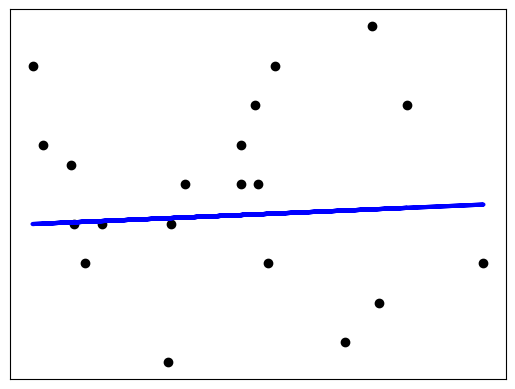

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# correlation heatmap for later
import seaborn as sns


# Loads cars dataset
df = pd.read_csv("cars.csv")

# Uuse horsepower to predict RPM
x = df[["hp"]].values   # the input (single feature)
y = df["rpm"].values        # the output im trying to predict

# split the data into training/testing sets
x_train = x[:-20]
x_test = x[-20:]

y_train = y[:-20]
y_test = y[-20:]

regr = linear_model.LinearRegression()

# train the LRM model using the training sets
regr.fit(x_train, y_train)

# make predictions using the testing set
y_pred = regr.predict(x_test)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

3. Build a regression model to predict the “class” which is numeric. Remember that linear regression works only with features that are numeric, hence you have to think what to do with the categorical features.

Mean squared error: 30.505544379373905
R2 score: 0.6161203909448372


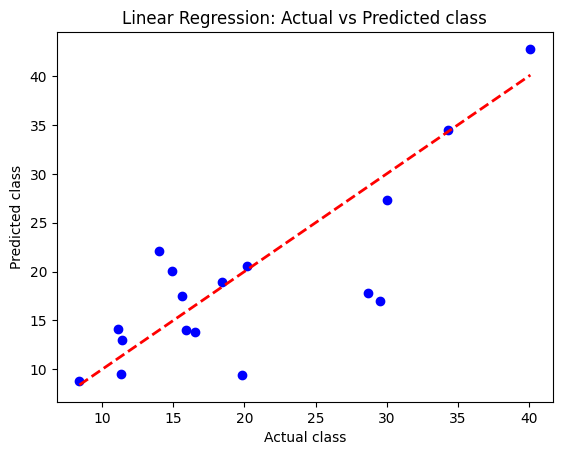

In [ ]:
# cleasns numeric columns (replace '?' with NaN and convert)
numeric_cols = ["c_mpg","h_mph","air_b","n_cil","eng_size","hp","rpm","rpmxmile",
                "tank_cap","passen","length","wheelbase","widh","u_turn_space",
                "rear_seat_room","lugg_cap","weight","dom","class"]
# this whole thing cleans up the data
df.replace('?', pd.NA, inplace=True)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# drops rows with missing values
df.dropna(inplace=True)

# one-hot encode categorical columns
categorical_cols = ["brand","type","drive_train","trans"]
df_encoded = pd.get_dummies(df[categorical_cols])

# combine numeric + encoded categorical columns
numeric_cols.remove("class")  # remove target
X = pd.concat([df[numeric_cols], df_encoded], axis=1)
y = df["class"].values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

# train regression
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# evaluate
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

# plot predicted vs actual
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Linear Regression: Actual vs Predicted class")
plt.show()

4. Plot some descriptive stats of the dataset. Explain what the stats tell you about the dataset.

           c_mpg      h_mph      air_b  drive_train      n_cil   eng_size  \
count  82.000000  82.000000  82.000000    82.000000  82.000000  82.000000   
mean   23.085366  29.975610   0.853659     0.890244   4.853659   2.589024   
std     5.593650   5.011039   0.722170     0.471564   1.296928   1.004067   
min    16.000000  22.000000   0.000000     0.000000   3.000000   1.000000   
25%    19.000000  26.000000   0.000000     1.000000   4.000000   1.800000   
50%    22.000000  29.000000   1.000000     1.000000   4.000000   2.300000   
75%    25.000000  32.750000   1.000000     1.000000   6.000000   3.200000   
max    46.000000  50.000000   2.000000     2.000000   8.000000   5.700000   

               hp          rpm     rpmxmile      trans  ...     passen  \
count   82.000000    82.000000    82.000000  82.000000  ...  82.000000   
mean   139.951220  5328.048780  2367.865854   0.682927  ...   4.939024   
std     51.055018   583.735182   497.282759   0.468200  ...   0.708808   
min     55

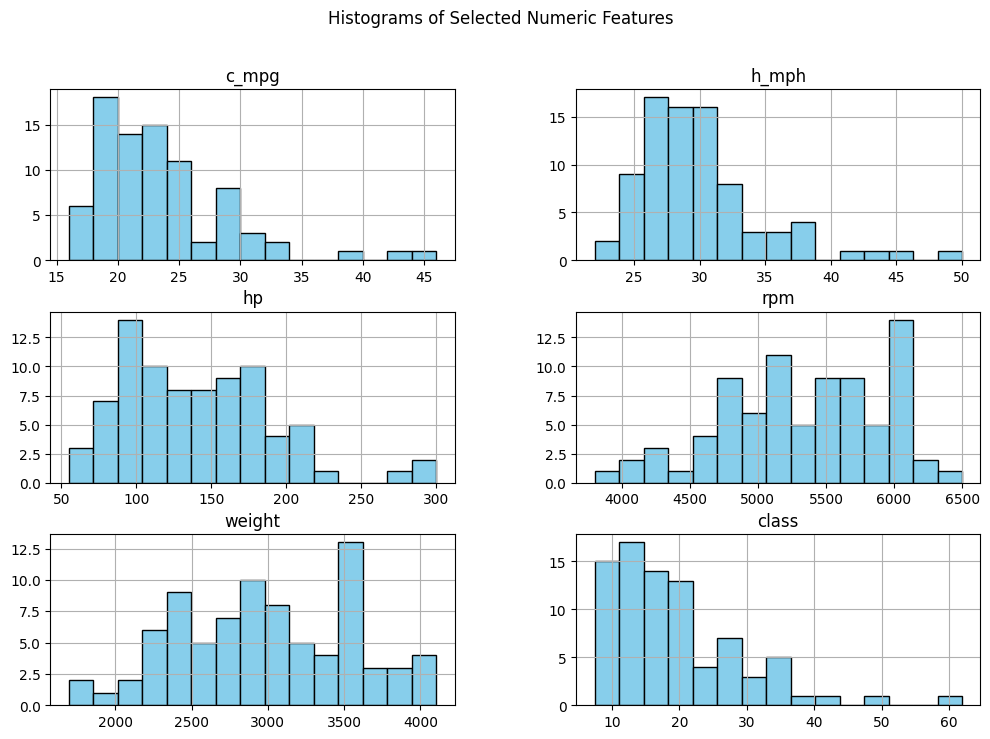

<Figure size 1200x600 with 0 Axes>

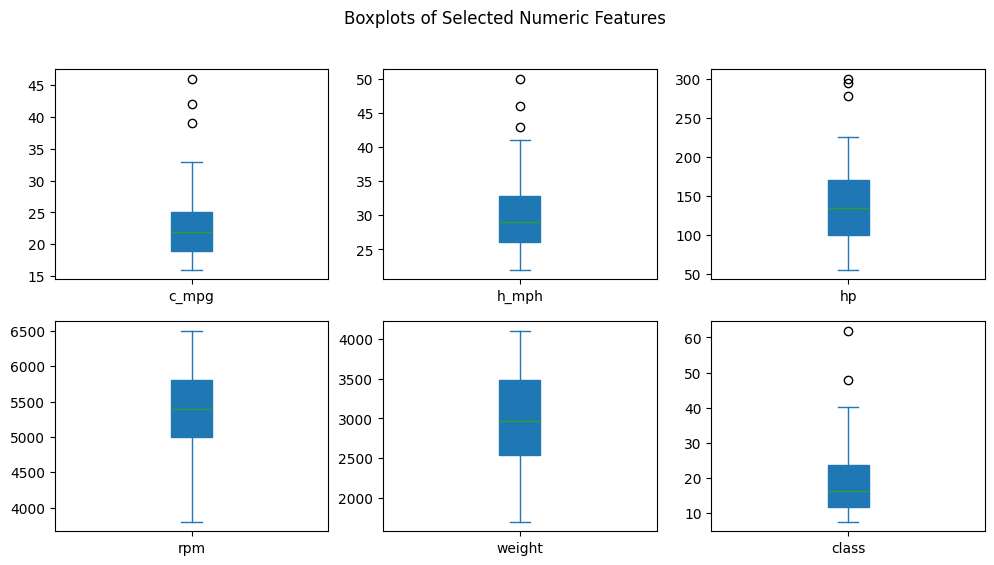

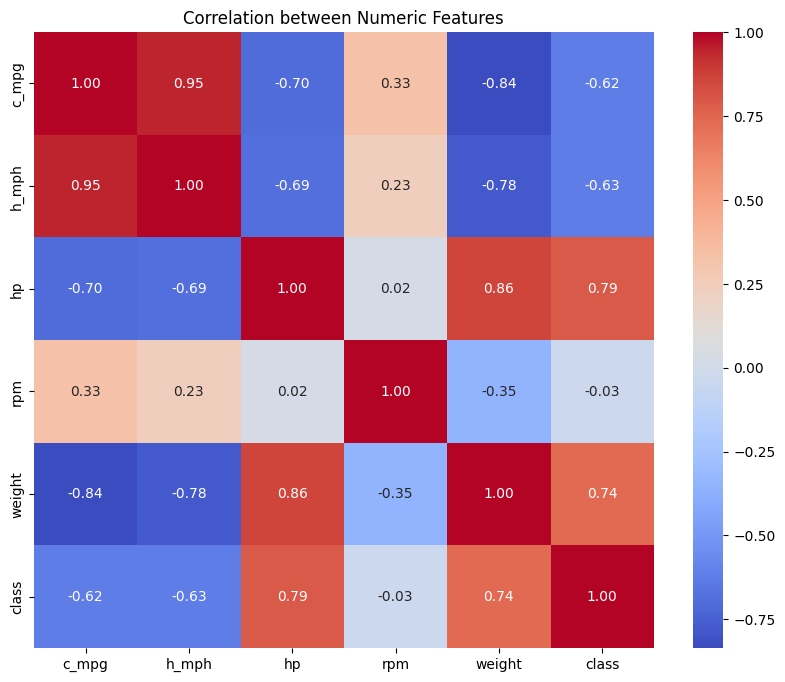

In [ ]:
stats = df.describe()
print(stats)

numeric_features = ["c_mpg", "h_mph", "hp", "rpm", "weight", "class"]

df[numeric_features].hist(figsize=(12,8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Selected Numeric Features")
plt.show()

# boxplots to see outliers
plt.figure(figsize=(12,6))
df[numeric_features].plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,
                          figsize=(12,6), patch_artist=True)
plt.suptitle("Boxplots of Selected Numeric Features")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Numeric Features")
plt.show()

5. Run a 10-fold CV and evaluate your model, how well it works.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# creates the model
model = LinearRegression()

# defines 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# evaluate with R² score
r2_scores = cross_val_score(model, X.values, y, cv=kf, scoring='r2')

print("R² scores for each fold:", r2_scores)
print("Mean R² score:", np.mean(r2_scores))
print("Standard deviation of R²:", np.std(r2_scores))

# evaluate with Mean Squared Error (MSE)
mse_scores = cross_val_score(model, X.values, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # convert to positive

print("MSE scores for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard deviation of MSE:", np.std(mse_scores))

R² scores for each fold: [ 0.66314189  0.52897078  0.71006078  0.58123311  0.7839195   0.12027525
  0.38213962 -0.56222626  0.8408959   0.84109197]
Mean R² score: 0.488950254456357
Standard deviation of R²: 0.40945434253233376
MSE scores for each fold: [28.20159425 30.4603546  17.9645887  42.86393244 21.09509518 31.10046916
 59.24190156 49.42468932 11.73710921 41.17264789]
Mean MSE: 33.32623823161814
Standard deviation of MSE: 14.051392920272088


6. What do the coefficients tell you about the features?

Mean R^2 score: 
1. Mean R^2 = 0.49 on average, the model explains about 49% of the variance in class.
2. std = 0.41 very high variability across folds; the model's performance is unstable depending on which
date it trains on. 

Squared Error (MSE)
1. Mean MSE = 33.3 on average, the squared error of predictions is 33.3 units of class 
2. std = 14.05 high variabilityl; some folds have much higher error (e.g., 59.2) while others are very low (11.7)


7. Add a section called Part 2. Multiple Linear Regression in Weka. For each of the next points, whenever there is a double asterisk that means you have to upload that image to your Jupyter Notebook along with some narrative explaining each point (this should be in a Markdown cell).


# Part 2:

8. Now open your laptop open weka. 

9. Load the cars dataset (import as csv). Make sure to select csv in the file type drop down (otherwise weka compains). You might need to modify the header of the file to comply with weka's format in case of issues **

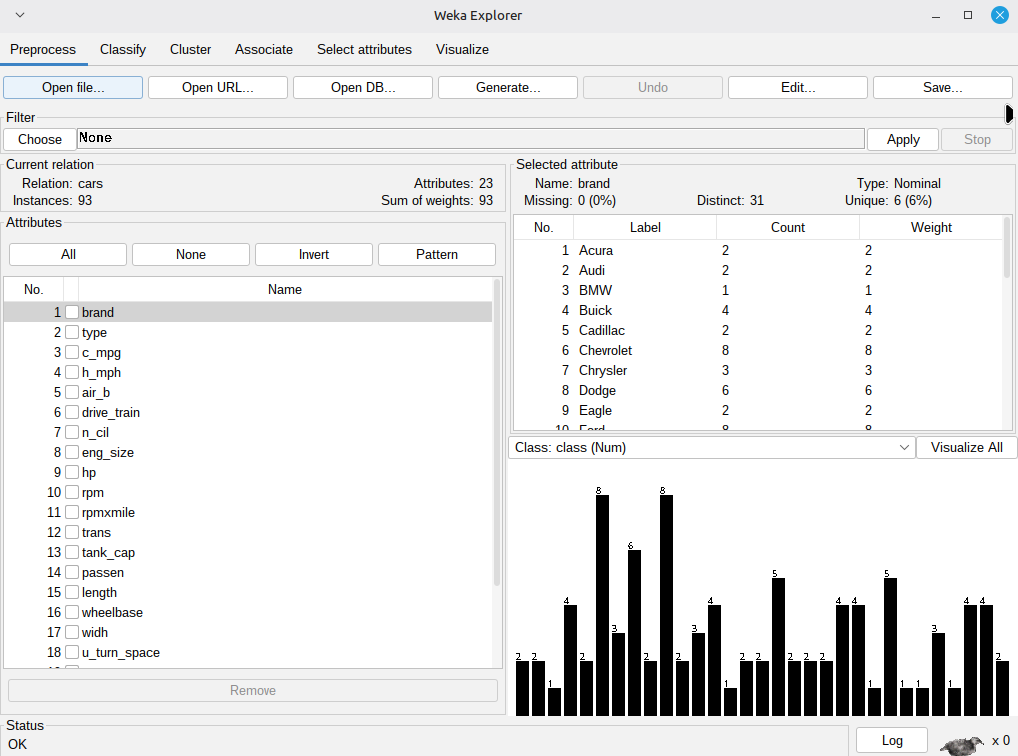

The left side provides each feature in car.csv. in total there are 23. on the top right we see the count of each instances for the "brand" feature. The bar graph shows the same thing but visuzalised. We can do this for each feature. 

10. Remove the categorical features. Why do you have to do it? **

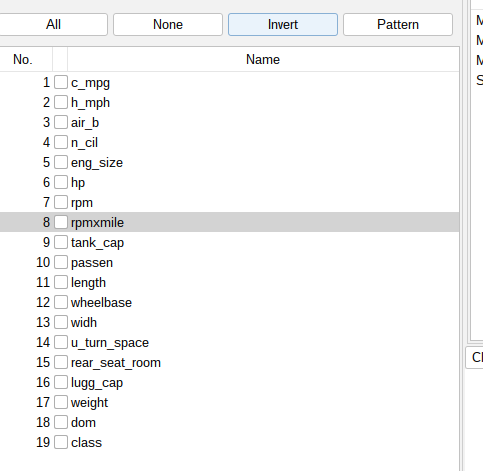

categorical: brand, type, drive_train, trans
These have to be removed because linear regression only works with numbers. This means that categorical text would beed special treatment. 

11. Change the class feature to be the one labeled class (which is numeric)**

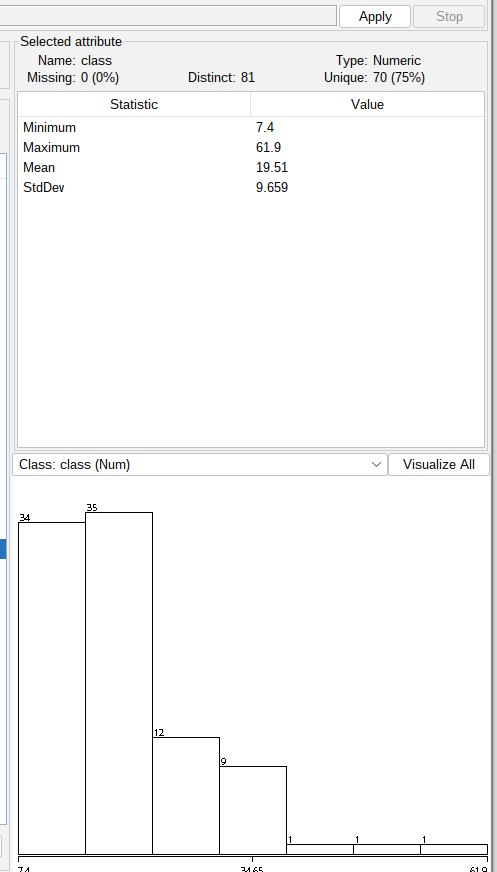

the stats from the class category show us that there are: 
70 unique values, the minimum is 7.4, max is 61.9, the average is 19.51, and the stdDev is 9.659.

12. Run the Multiple Linear Regression model. Doing a 10-fold CV, make sure to print the output of each of the 10 folds. **

=== Run information ===

Scheme:       weka.classifiers.functions.LinearRegression -S 0 -R 1.0E-8 -num-decimal-places 4
Relation:     cars-weka.filters.unsupervised.attribute.Remove-R1-2,6,12
Instances:    93
Attributes:   19
              c_mpg
              h_mph
              air_b
              n_cil
              eng_size
              hp
              rpm
              rpmxmile
              tank_cap
              passen
              length
              wheelbase
              widh
              u_turn_space
              rear_seat_room
              lugg_cap
              weight
              dom
              class
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===


Linear Regression Model

c_mpg =

      0.9039 * h_mph +
      0.3679 * n_cil +
      0.0015 * rpmxmile +
      0.6423 * passen +
     -0.0613 * length +
     -0.1814 * lugg_cap +
      1.1716

Time taken to build model: 0 seconds

=== Predictions on test data ===

    inst#     actual  predicted      error
        1     22         21.174     -0.826 
        2     20         20.085      0.085 
        3     15         15.836      0.836 
        4     17         14.317     -2.683 
        5     24         23.095     -0.905 
        6     17         18.115      1.115 
        7     21         18.633     -2.367 
        8     29         27.508     -1.492 
        9     20         23.397      3.397 
       10     18         16.341     -1.659 
        1     31         33.766      2.766 
        2     21         24.21       3.21  
        3     22         22.067      0.067 
        4     16         14.38      -1.62  
        5     26         25.996     -0.004 
        6     18         15.544     -2.456 
        7     21         20.181     -0.819 
        8     46         44.864     -1.136 
        9     23         24.441      1.441 
       10     17         16.177     -0.823 
        1     19         20.417      1.417 
        2     20         19.488     -0.512 
        3     17         16.897     -0.103 
        4     31         29.171     -1.829 
        5     30         31.161      1.161 
        6     25         27.933      2.933 
        7     24         23.342     -0.658 
        8     24         23.847     -0.153 
        9     18         18.437      0.437 
       10     19         19.479      0.479 
        1     28         28.123      0.123 
        2     18         17.414     -0.586 
        3     42         36.555     -5.445 
        4     23         24.539      1.539 
        5     20         20.553      0.553 
        6     17         16.531     -0.469 
        7     23         23.741      0.741 
        8     18         17.858     -0.142 
        9     16         17.319      1.319 
        1     18         17.696     -0.304 
        2     24         25.597      1.597 
        3     19         19.815      0.815 
        4     29         29.073      0.073 
        5     19         17.902     -1.098 
        6     16         18.275      2.275 
        7     18         18.871      0.871 
        8     18         16.82      -1.18  
        9     39         37.121     -1.879 
        1     25         28.827      3.827 
        2     25         24.399     -0.601 
        3     17         16.661     -0.339 
        4     21         21.654      0.654 
        5     26         28.264      2.264 
        6     25         24.923     -0.077 
        7     17         17.555      0.555 
        8     19         18.311     -0.689 
        9     19         19.819      0.819 
        1     20         20.145      0.145 
        2     23         21.2       -1.8   
        3     20         20.098      0.098 
        4     18         16.418     -1.582 
        5     23         23.552      0.552 
        6     29         26.682     -2.318 
        7     18         20.575      2.575 
        8     25         26.87       1.87  
        9     22         24.202      2.202 
        1     29         26.585     -2.415 
        2     29         27.311     -1.689 
        3     18         16.691     -1.309 
        4     23         20.739     -2.261 
        5     19         19.851      0.851 
        6     22         23.386      1.386 
        7     20         20.35       0.35  
        8     33         31.634     -1.366 
        9     20         17.913     -2.087 
        1     21         21.74       0.74  
        2     28         30.438      2.438 
        3     15         13.428     -1.572 
        4     25         25.974      0.974 
        5     29         27.232     -1.768 
        6     18         16.814     -1.186 
        7     23         24.766      1.766 
        8     32         32.386      0.386 
        9     19         21.219      2.219 
        1     19         18.881     -0.119 
        2     24         21.208     -2.792 
        3     17         17.226      0.226 
        4     21         20.124     -0.876 
        5     23         22.814     -0.186 
        6     22         21.505     -0.495 
        7     22         21.139     -0.861 
        8     22         20.975     -1.025 
        9     19         18.929     -0.071 

=== Cross-validation ===
=== Summary ===

Correlation coefficient                  0.9586
Mean absolute error                      1.2557
Root mean squared error                  1.5982
Relative absolute error                 30.1883 %
Root relative squared error             28.4463 %
Total Number of Instances               93     

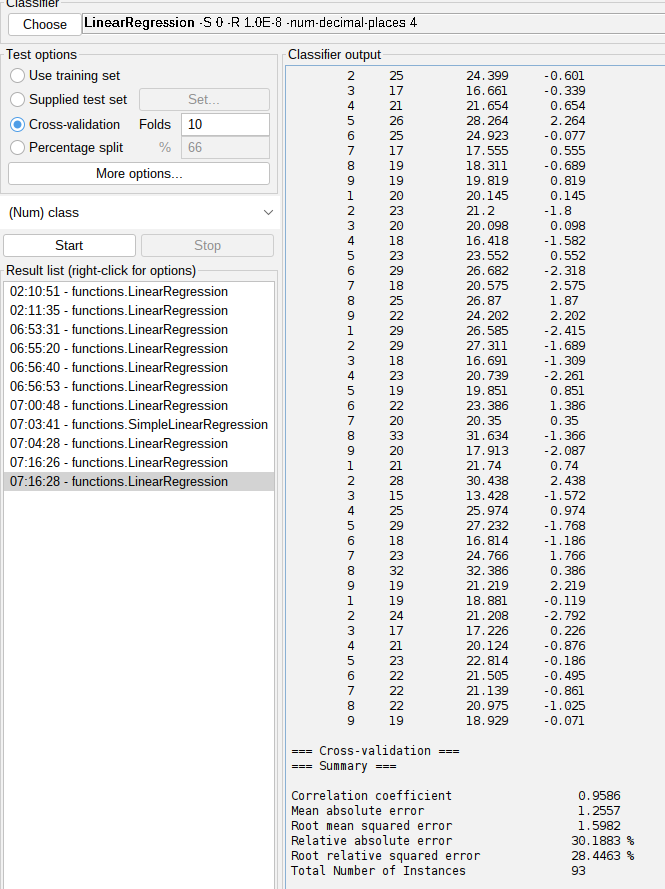

13. Analyze the results. What do the results tell you? How well does the model perform? **

these are the summary stats:
Correlation coefficient = 0.9586
Mean Absolute Error = 1.2557
Root Mean Squared Error = 1.5982
Relative errors (30% and 28%)

the model performs very well. The errors are small and correlaton is very high.

14. Describe in detail, what is the meaning of the coefficients, and how they explain the results? **

given: Correlation coefficient = 0.9586
this means that there is a very strong positive correlaton between predicted and actual values. The closer to 1, the better it is. 



15. Since you are predicting numeric values, how did evaluating the model compared with the Bayes Classifier you did in scikitlearn?

Evaluating the linear regression model is differnt from evaluating a bayes classifier becauase regression predicts continuous values, whereas bayes predict discrite classes.

16. Compare your experience using Weka and scikitlearn. What are the pros and cons, which one is better and why?

weka is very simple and intuitive for the most part. sklearn is a bit harder to use because you have to manually write the code but I think that would allow for better customizations since there could be limits with the weka GUI. Some versions of weka may also be missing important features from their GUI, if that happens, you would have to install the new version. it would be kinda annoying to have to switch between weka versions. 

last thing: Commit and push your JN to GitHub! Triple verify everything is fine.